In [6]:
import numpy as np
import matplotlib.pyplot as plt

def normal_pdf(x, mu, sigma_sq):
    return (1 / np.sqrt(2 * np.pi * sigma_sq)) * np.exp(-(x - mu)**2 / (2 * sigma_sq))


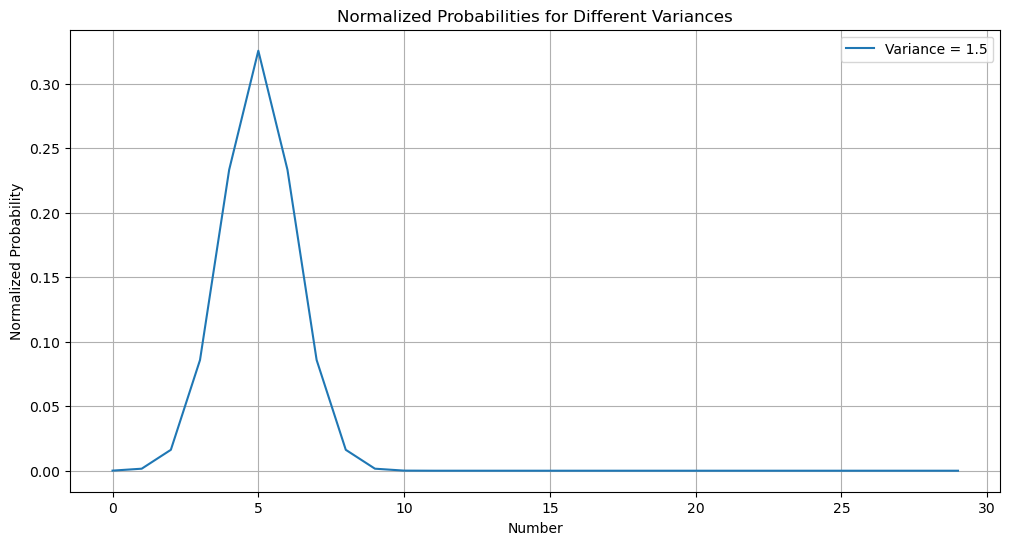

In [19]:
# 다양한 분산 값에 대한 확률 분포를 계산
variances = [1.5]
normalized_probabilities_var = {}

numbers_30 = np.arange(30)
mu_30 = 5

for var in variances:
    pdf_values_var = normal_pdf(numbers_30, mu_30, var)
    total_pdf_var = np.sum(pdf_values_var)
    normalized_probabilities_var[var] = pdf_values_var / total_pdf_var

# 그래프로 결과를 표시
plt.figure(figsize=(12, 6))

for var in variances:
    plt.plot(numbers_30, normalized_probabilities_var[var], label=f'Variance = {var}')

plt.title('Normalized Probabilities for Different Variances')
plt.xlabel('Number')
plt.ylabel('Normalized Probability')
plt.legend()
plt.grid(True)
plt.show()

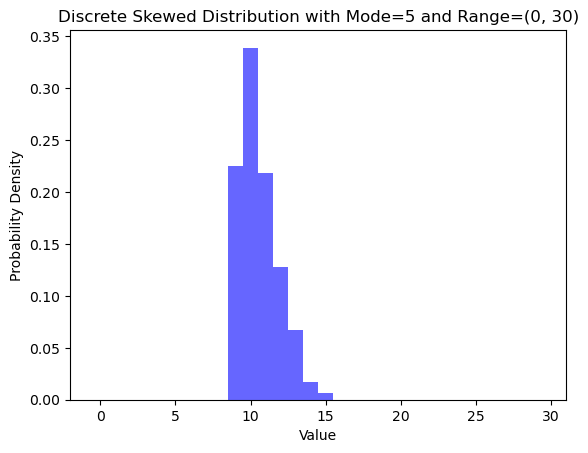

In [36]:

# Define the range and mode
x_range = np.arange(0, 31)

mode = 10  # Mode of the distribution #TODO '
skewness = 20  # Adjust this parameter to control the skewness
scale = 1
#### cal mean ! ####
mean = mode - 1

range_min = 0
range_max = 30
data = skewnorm.rvs(a=skewness, loc=mean, scale=2, size=1000)   #loc가 평균을 의미  ...
data = np.clip(data, range_min, range_max)
# Round the continuous data to convert it to discrete values
discrete_data = np.round(data).astype(int)

# Clip data to fit within the desired range (0, 30)
discrete_data = np.clip(discrete_data, range_min, range_max)

# Plot the histogram for the discrete distribution
plt.hist(discrete_data, bins=range(range_min, range_max + 1), density=True, alpha=0.6, color='b', align='left')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.title('Discrete Skewed Distribution with Mode=5 and Range=(0, 30)')
plt.show()

# def calculate_weights(x, N):
#     return (x/N)**2 * np.exp(-0.1 * (x - N)**2)

# # Calculate weights
# weights = calculate_weights(x_range, N)

# # Normalize the weights to make them probabilities
# weights = weights / np.sum(weights)

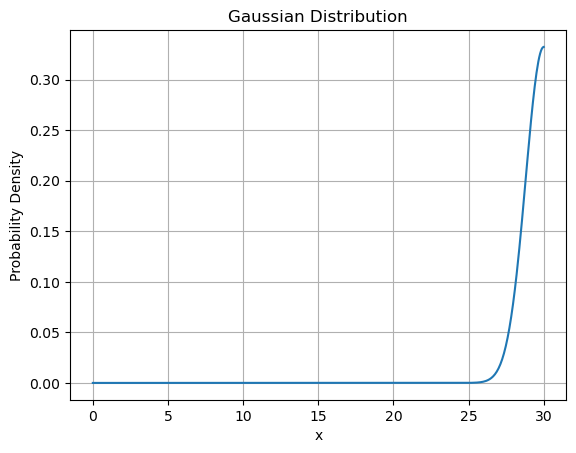

In [45]:
import numpy as np
import matplotlib.pyplot as plt

# 가우시안 함수
def gaussian(x, mu, sigma):
    return (1.0 / np.sqrt(2 * np.pi * sigma**2)) * np.exp(-((x - mu)**2) / (2 * sigma**2))

def main():
    # 평균과 표준편차 설정
    mean_value = int(input())  # 예시 값
    std_dev = 1.2     # 예시 값

    # x 값 범위 설정
    x = np.linspace(0, 30, 500)

    # 가우시안 함수 계산
    y = gaussian(x, mean_value, std_dev)

    # 그래프 그리기
    plt.plot(x, y)
    plt.title("Gaussian Distribution")
    plt.xlabel("x")
    plt.ylabel("Probability Density")
    plt.grid(True)
    plt.show()
    
main()